In [3]:
## Uncomment the following line to install gurobipy if not already installed
# !pip install gurobipy

In [3]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

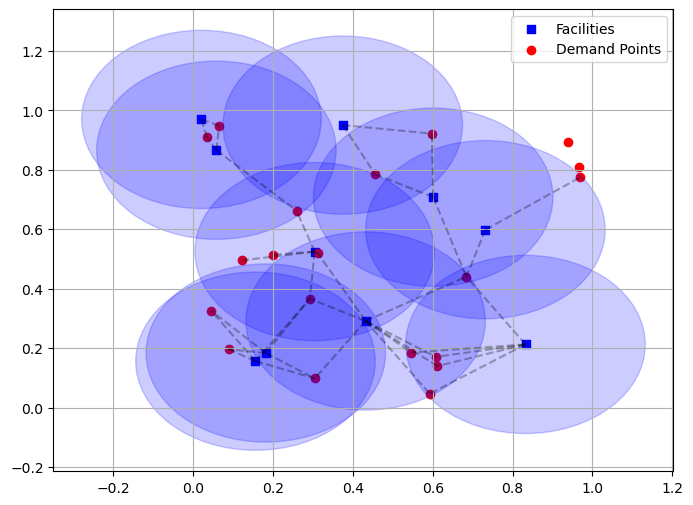

In [4]:
# Parameters
num_facilities = 10
num_demand_points = 15
covering_radius = 0.3  # Maximum coverage distance
p = 4  # Number of facilities to open

# Generate random positions for facilities and demand points
np.random.seed(10)
# Parameters
num_facilities = 10  # Number of potential facility locations
num_demand_points = 20  # Number of demand points
covering_radius = 0.3  # Coverage radius

# Generate random positions for facilities and demand points
np.random.seed(42)
facility_positions = np.random.rand(num_facilities, 2)
demand_positions = np.random.rand(num_demand_points, 2)

# Compute the covering matrix I(j) (which demand points are covered by which facilities)
I_j = {j: [] for j in range(num_demand_points)}
# w = np.random.randint(1, 10, num_demand_points)  # Random weights for demand points

for j in range(num_demand_points):
    for i in range(num_facilities):
        distance = np.linalg.norm(demand_positions[j] - facility_positions[i])
        if distance <= covering_radius:
            I_j[j].append(i)

# Plot the facilities and demand points
plt.figure(figsize=(8, 6))
plt.scatter(facility_positions[:, 0], facility_positions[:, 1], c='blue', marker='s', label='Facilities')
plt.scatter(demand_positions[:, 0], demand_positions[:, 1], c='red', marker='o', label='Demand Points')

# Add coverage circles around each facility
for i in range(num_facilities):
    circle = plt.Circle(facility_positions[i], covering_radius, color='blue', alpha=0.2, fill=True)
    plt.gca().add_patch(circle)

# Draw coverage connections
for j, facilities in I_j.items():
    for i in facilities:
        plt.plot([facility_positions[i, 0], demand_positions[j, 0]],
                 [facility_positions[i, 1], demand_positions[j, 1]], 'k--', alpha=0.3)

plt.grid(True)
plt.legend()
plt.show()

In [5]:
# Optimization Model
model = gp.Model("Maximal Covering Location")
model.setParam('OutputFlag', 0)  # Disable verbose output


# Decision Variables: x[i] = 1 if facility i is open, 0 otherwise
x = model.addVars(num_facilities, vtype=GRB.BINARY, name="x") # Define x as decision variable
y = model.addVars(num_demand_points, vtype=GRB.BINARY, name="y")  # Demand point covered/uncovered

# Objective Function: Maximize the total covered demand (weighted)
model.setObjective(gp.quicksum(y[j] for j in range(num_demand_points)), GRB.MAXIMIZE)  

# Constraints
# 1. Each demand point can be covered by at most one facility:
for j in range(num_demand_points):
    model.addConstr(gp.quicksum(x[i] for i in I_j[j]) >= y[j])  

# 2. Limit the number of open facilities to p:
model.addConstr(gp.quicksum(x[i] for i in range(num_facilities)) == p)

# Solve the model
model.optimize()

# Print results
open_facilities = []
for i in range(num_facilities):
    if x[i].x > 0.5:
        open_facilities.append(i)
print(f"{model.objVal:.2f} {open_facilities}")



Restricted license - for non-production use only - expires 2026-11-23
15.00 [0, 2, 3, 9]


## What is the optimal solution and the optimal value of this model?

In [1]:
# Plot the facilities and demand points
plt.figure(figsize=(8, 6))
plt.scatter(facility_positions[:, 0], facility_positions[:, 1], c='blue', marker='s', label='Facilities')
plt.scatter(demand_positions[:, 0], demand_positions[:, 1], c='red', marker='o', label='Demand Points')

# Add coverage circles around each facility
for i in range(num_facilities):
    if i in open_facilities:
        plt.scatter(facility_positions[i, 0], facility_positions[i, 1], c='green', marker='s')
        circle = plt.Circle(facility_positions[i], covering_radius, color='blue', alpha=0.2, fill=True)
        plt.gca().add_patch(circle)

# Draw coverage connections
for j, facilities in I_j.items():
    for i in facilities:
        plt.plot([facility_positions[i, 0], demand_positions[j, 0]],
                 [facility_positions[i, 1], demand_positions[j, 1]], 'k--', alpha=0.3)

plt.legend()
plt.show()

NameError: name 'plt' is not defined